In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = torch.load('comparison_dict.pt')

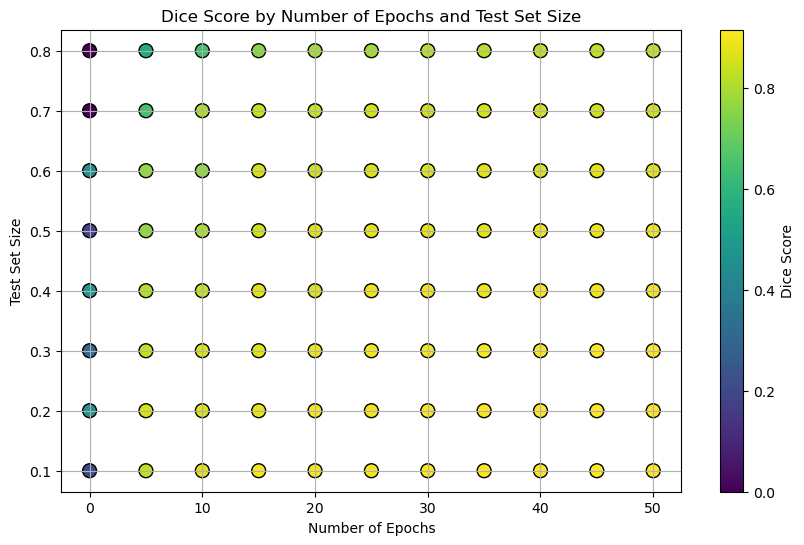

In [3]:
test_sizes = np.linspace(0.1, 0.8, 8)
epochs = []
test_size_values = []
dice_scores = []

for i, test_size in enumerate(test_sizes, start=1):
    for epoch_str in data[i]:
        epoch = int(epoch_str)
        dice_score = data[i][epoch_str]['dice'][0]

        epochs.append(epoch)
        test_size_values.append(test_size)
        dice_scores.append(dice_score)

plt.figure(figsize=(10, 6))
sc = plt.scatter(epochs, test_size_values, c=dice_scores, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(sc, label='Dice Score')
plt.xlabel('Number of Epochs')
plt.ylabel('Test Set Size')
plt.title('Dice Score by Number of Epochs and Test Set Size')
plt.grid(True)
plt.show()

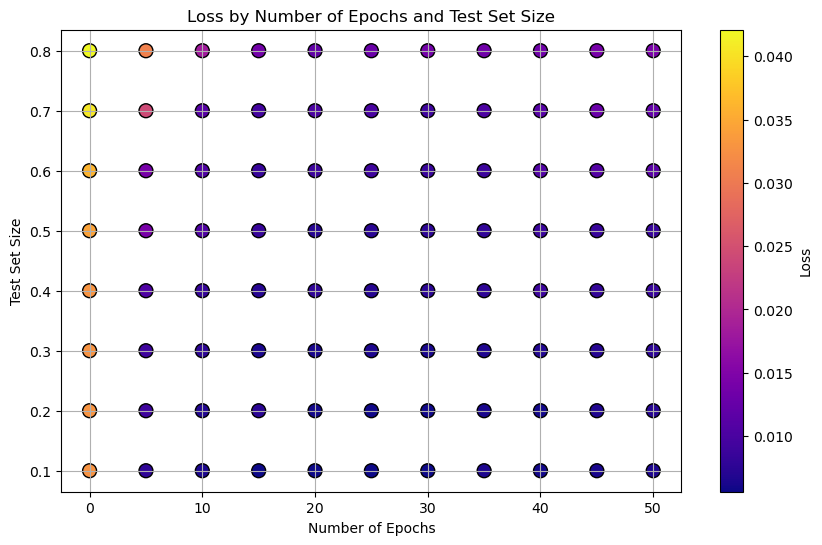

In [4]:
loss_values = []

for i, test_size in enumerate(test_sizes, start=1):
    for epoch_str in data[i]:
        epoch = int(epoch_str)
        loss_value = data[i][epoch_str]['loss'][0]

        loss_values.append(loss_value)

plt.figure(figsize=(10, 6))
sc = plt.scatter(epochs, test_size_values, c=loss_values, cmap='plasma', s=100, edgecolor='k')
plt.colorbar(sc, label='Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Test Set Size')
plt.title('Loss by Number of Epochs and Test Set Size')
plt.grid(True)
plt.show()

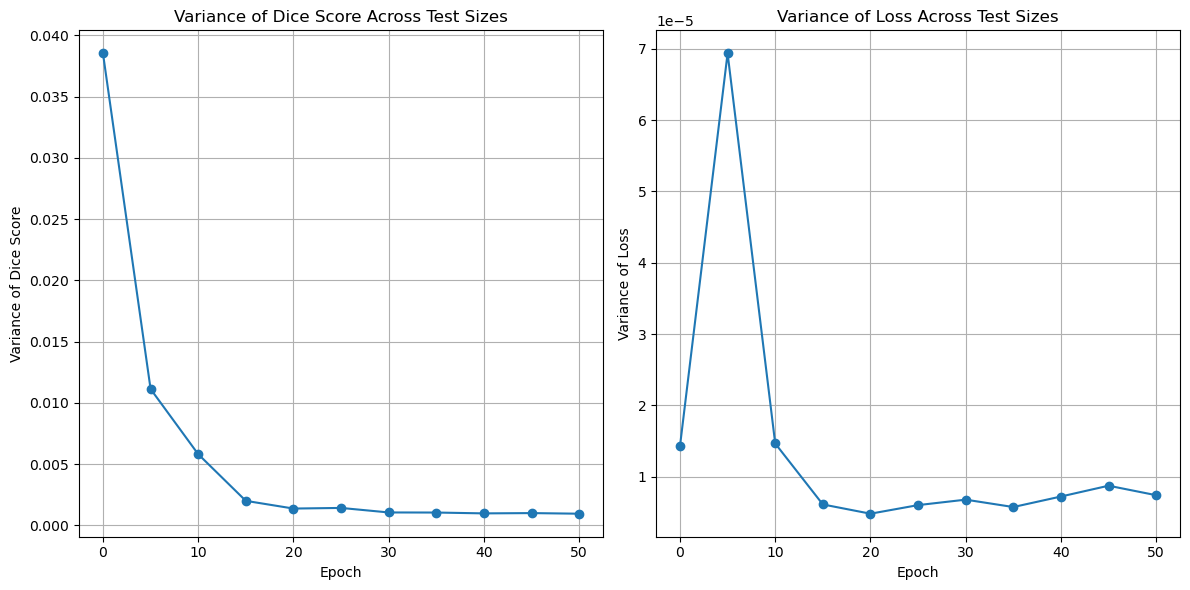

In [5]:
import pandas as pd

df = pd.DataFrame({
    'epoch': epochs,
    'test_size': test_size_values,
    'dice_score': dice_scores,
    'loss': loss_values
})

dice_variance = df.groupby('epoch')['dice_score'].var()
loss_variance = df.groupby('epoch')['loss'].var()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(dice_variance.index, dice_variance.values, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Variance of Dice Score')
plt.title('Variance of Dice Score Across Test Sizes')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(loss_variance.index, loss_variance.values, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Variance of Loss')
plt.title('Variance of Loss Across Test Sizes')
plt.grid(True)

plt.tight_layout()
plt.show()


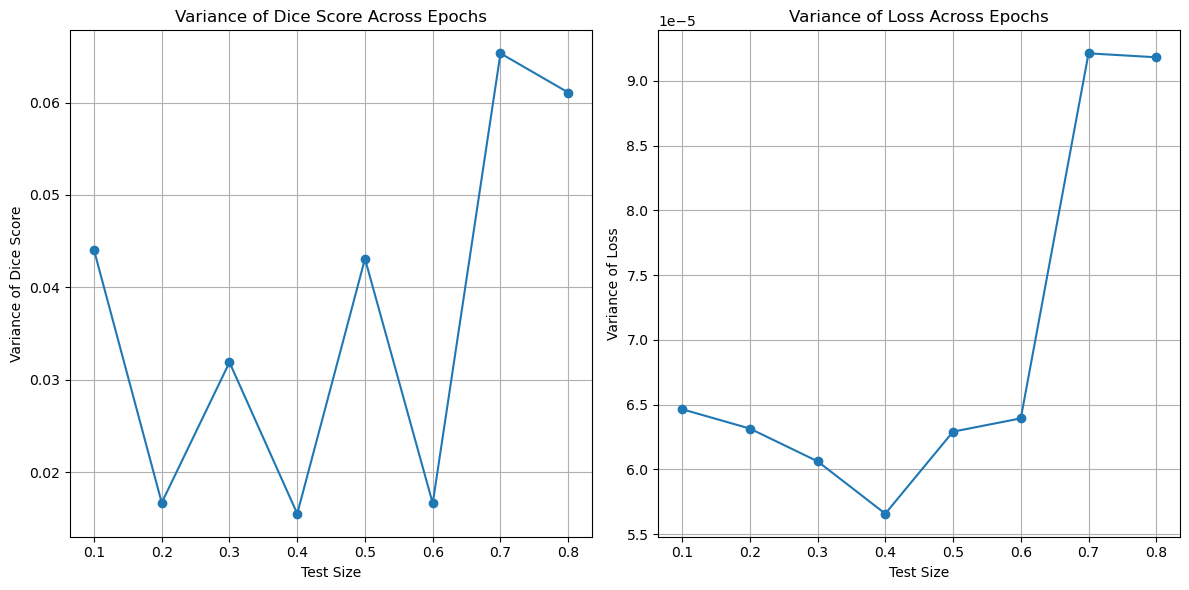

In [6]:
dice_variance_by_test_size = df.groupby('test_size')['dice_score'].var()
loss_variance_by_test_size = df.groupby('test_size')['loss'].var()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(dice_variance_by_test_size.index, dice_variance_by_test_size.values, marker='o', linestyle='-')
plt.xlabel('Test Size')
plt.ylabel('Variance of Dice Score')
plt.title('Variance of Dice Score Across Epochs')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(loss_variance_by_test_size.index, loss_variance_by_test_size.values, marker='o', linestyle='-')
plt.xlabel('Test Size')
plt.ylabel('Variance of Loss')
plt.title('Variance of Loss Across Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()


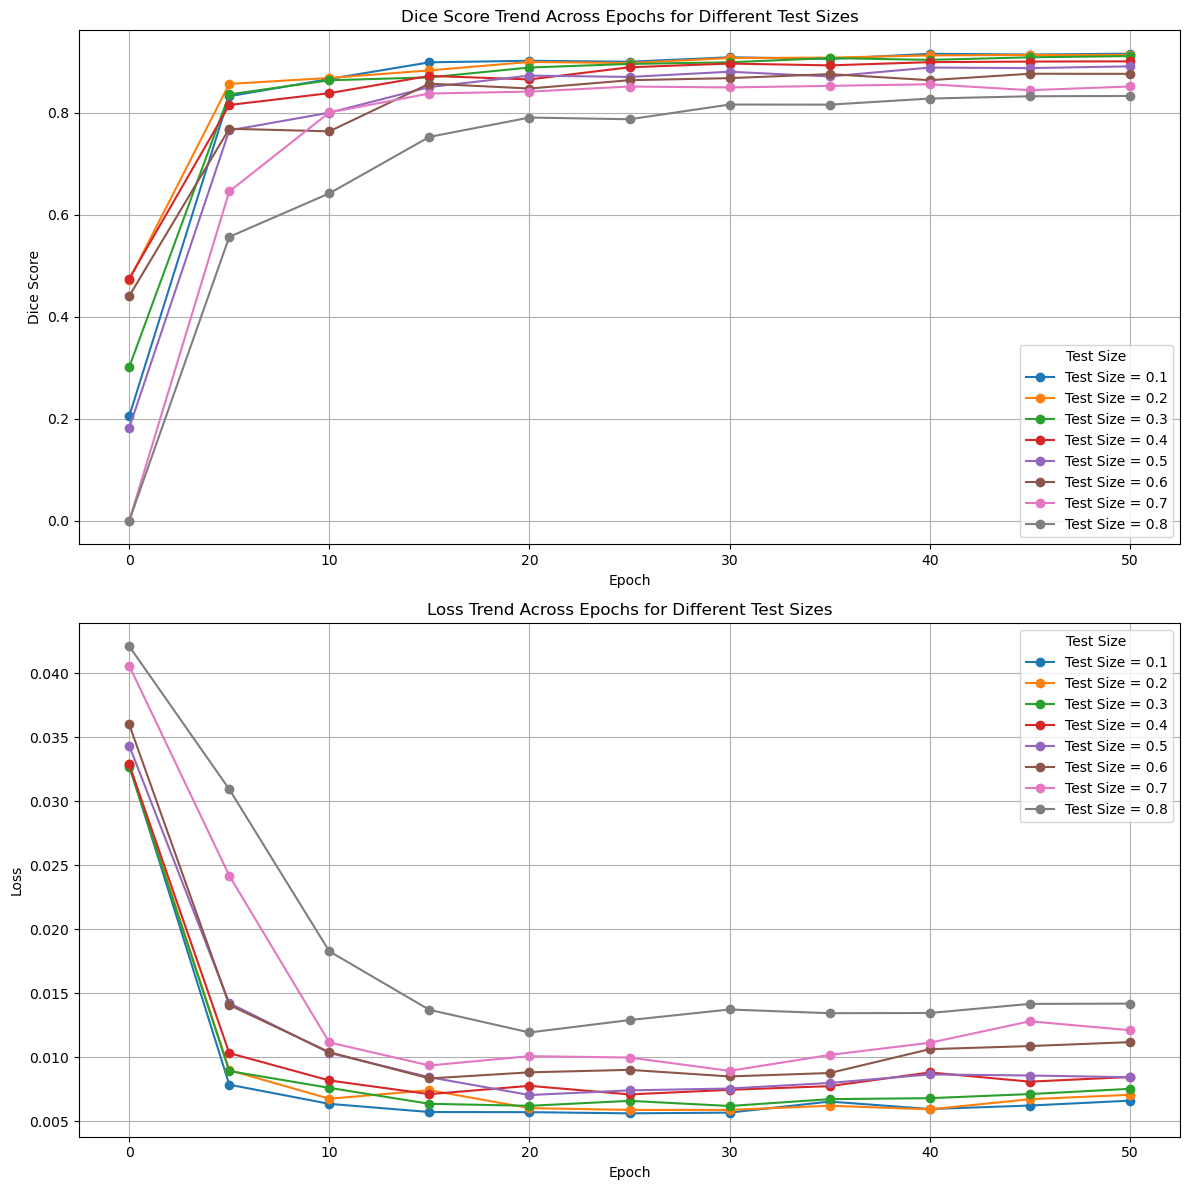

In [7]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
for test_size in sorted(df['test_size'].unique()):
    subset = df[df['test_size'] == test_size]
    plt.plot(subset['epoch'], subset['dice_score'], marker='o', linestyle='-', label=f'Test Size = {test_size:.1f}')

plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.title('Dice Score Trend Across Epochs for Different Test Sizes')
plt.legend(title="Test Size")
plt.grid(True)


plt.subplot(2, 1, 2)
for test_size in sorted(df['test_size'].unique()):
    subset = df[df['test_size'] == test_size]
    plt.plot(subset['epoch'], subset['loss'], marker='o', linestyle='-', label=f'Test Size = {test_size:.1f}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Trend Across Epochs for Different Test Sizes')
plt.legend(title="Test Size")
plt.grid(True)

plt.tight_layout()
plt.show()